In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [19]:
def tanh(x):
    return np.tanh(x)

In [23]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

In [20]:
def relu(x):
    return np.maximum(0, x)

In [24]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [27]:
# MLP Class
class MLP:
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        # Init the weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

        # Setting activation function
        self.activation = activation
        self.activation_function = relu if activation == 'relu' else sigmoid
        self.activation_derivative = relu_derivative if activation == 'relu' else sigmoid_derivative

    def forward(self, X):
        self.input_layer = X
        self.hidden_layer = self.activation_function(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights_hidden_output) + self.bias_output)
        return self.output_layer

    def backward(self, X, y, learning_rate):
        # Calculating error
        output_error = self.output_layer - y
        output_delta = output_error * sigmoid_derivative(self.output_layer)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activation_derivative(self.hidden_layer)

        # Updating weights and biases
        self.weights_hidden_output -= self.hidden_layer.T.dot(output_delta) * learning_rate
        self.bias_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden -= X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

    def predict(self, X):
        return self.forward(X)

In [28]:
# Generating synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
y = y.reshape(-1, 1)

In [29]:
# spliting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# creating and training our MLP model
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
mlp = MLP(input_size, hidden_size, output_size, activation='relu') #try experimenting with diff activation fucntions
mlp.train(X_train, y_train, epochs=1000, learning_rate=0.01)

In [34]:
# Predicting and evaluating
y_pred = mlp.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_class)

In [37]:
# settign up the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

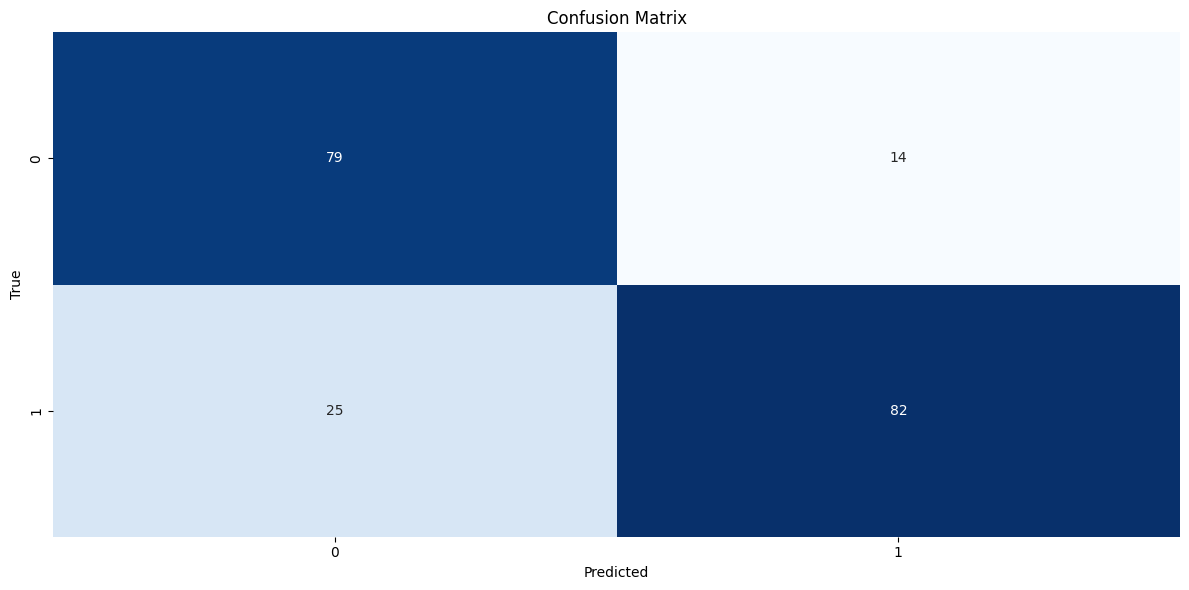

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [41]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81
